In [1]:
EPTA_dir='EPTA_J1713/'
EINPTA_dir='EPTA+INPTA_J1713/'

In [2]:
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'../..')))
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND
import getdist
getdist.chains.print_load_details = False
import scipy
import matplotlib.pyplot as plt
import IPython
from IPython.display import Markdown
import numpy as np
import seaborn as sns
# import the tensiometer tools that we need:
import tensiometer
from tensiometer import utilities
from tensiometer import gaussian_tension
from tensiometer import mcmc_tension


2023-03-14 04:07:16.646641: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-14 04:07:16.673975: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-14 04:07:16.674546: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 04:07:17.165865: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
epta_1=np.loadtxt(EPTA_dir+'chain_1.txt')
par_epta=np.loadtxt(EPTA_dir+'pars.txt',dtype=str)
len_epta=len(par_epta)
epta_2=epta_1.T

In [4]:
einpta_1=np.loadtxt(EINPTA_dir+'chain_1.txt')
par_einpta=np.loadtxt(EINPTA_dir+'pars.txt',dtype=str)
len_einpta=len(par_einpta)
einpta_2=einpta_1.T

In [5]:
epta_arr=[epta_2[len(par_epta)-1],epta_2[len(par_epta)-2],epta_2[len(par_epta)-9],epta_2[len(par_epta)-10]]

einpta_arr=[einpta_2[len(par_einpta)-1],einpta_2[len(par_einpta)-2],einpta_2[len(par_einpta)-9],einpta_2[len(par_einpta)-10]]

In [6]:
names = ['rn_logA','rn_gamma','dm_logA','dm_gamma']
labels=['\log A_R','\gamma_R', '\log A_{DM}','\gamma_{DM}']
del_names=['delta_logA','delta_gamma']

In [7]:
epta=MCSamples(samples=np.array(epta_arr).transpose(),loglikes=epta_2[-3],names=names,labels=labels,label='EPTA')
einpta=MCSamples(samples=np.array(einpta_arr).transpose(),loglikes=einpta_2[-3],names = names,labels=labels,label='EPTA+INPTA')

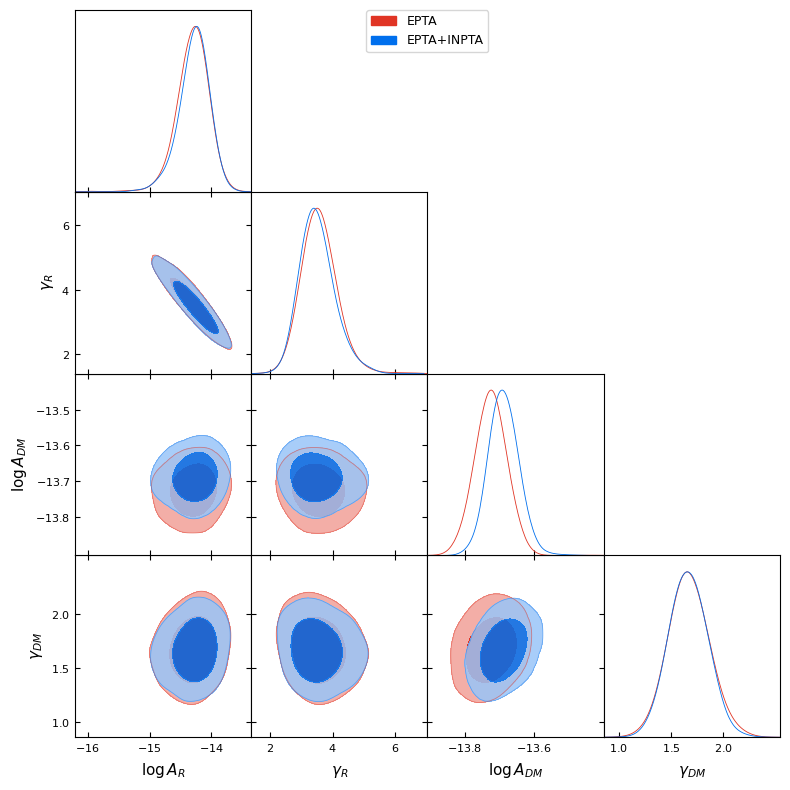

In [8]:
g = plots.get_subplot_plotter()
g.triangle_plot([epta,einpta], filled=True)

In [9]:
from diff_chain import  Diff_chain_shift

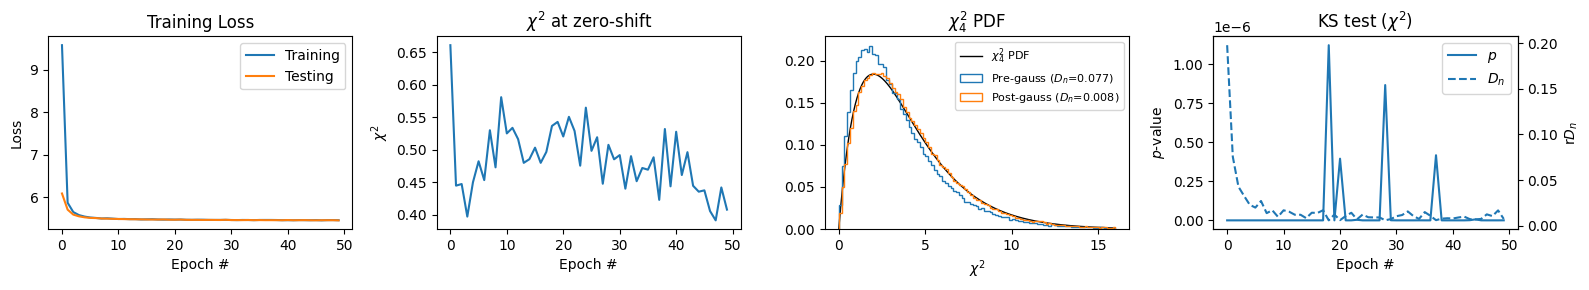

64/64 [==============================] - 2s 35ms/step - loss: 5.4647 - val_loss: 5.4611 - shift0_chi2: 0.4081 - shift0_pval: 0.0182 - shift0_nsigma: 0.0228 - chi2Z_ks: 0.0076 - chi2Z_ks_p: 2.2702e-10 - lr: 0.0100


In [10]:
diff_chain, shift_probability, shift_lower, shift_upper=Diff_chain_shift(epta,einpta)

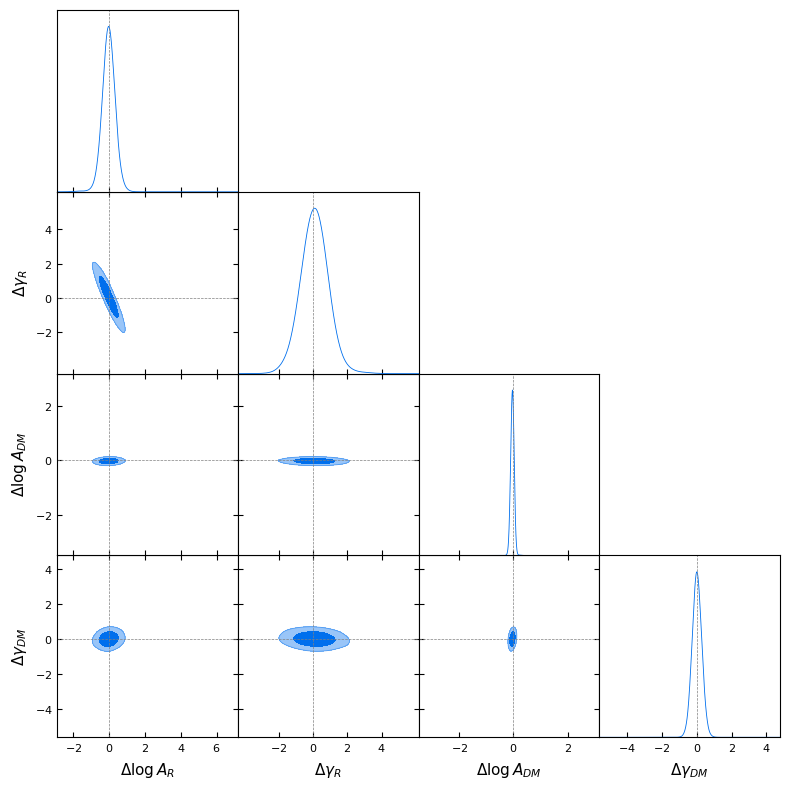

In [11]:
g = plots.get_subplot_plotter()
g.triangle_plot(diff_chain, filled=True,markers=[0,0,0,0])
plt.savefig('J1730_diff.png',dpi=300)

In [12]:
print(f'n_sigma = {utilities.from_confidence_to_sigma(shift_probability):.3f}')

n_sigma = 0.015
